In [1]:
cd ..

/blue/adamginsburg/adamginsburg/jwst/cloudc/code/lactea-filament/lactea-filament


In [2]:
from catalog_query import get_VVV_catalog
import cutout_manager

import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table

In [3]:
# importlib? 

In [4]:
pos_ctr = SkyCoord('17:46:20.9063719501', '-28:37:51.6942550990', unit=(u.hourangle, u.deg))

In [5]:
position_HMSFR = SkyCoord('17:46:21.4669695284', '-28:35:38.1118497742', unit=(u.hourangle, u.deg))


In [6]:
cutout_405 = cutout_manager.get_cutout_405(position_HMSFR, 8*u.arcmin, 3*u.arcmin)

In [7]:
cat_VVV = get_VVV_catalog(position_HMSFR, w=3*u.arcmin, l=8*u.arcmin)
#get_VVV_catalog(pos_ctr, w=2*u.arcmin, l=2*u.arcmin)
print(len(cat_VVV))

9023


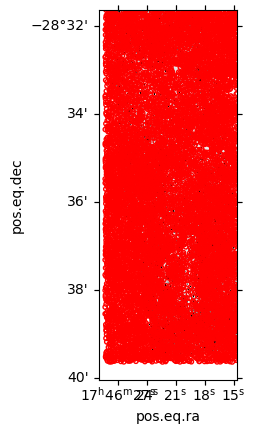

In [8]:
ax = plt.subplot(projection=cutout_405.wcs)

ax.imshow(cutout_405.data, cmap='Greys', vmin=0, vmax=50)
ax.scatter(cat_VVV['RAJ2000'], cat_VVV['DEJ2000'], transform=ax.get_transform('world'), s=10, facecolor='none', edgecolor='red')

In [15]:
cat_VVV.columns

<TableColumns names=('SrcID','RAJ2000','DEJ2000','Name','PriOrSec','H1-Ks1pnt','e_H1-Ks1pnt','H2-Ks2pnt','e_H2-Ks2pnt','Clst','Cl','pStar','pGal','pNoise','_tab1_27','Z1ap1','e_Z1ap1','_tab1_30','e_Z1ap3','Z1perrb','_tab1_45','Z2ap1','e_Z2ap1','_tab1_48','e_Z2ap3','Z2perrb','_tab1_63','Y1ap1','e_Y1ap1','_tab1_66','e_Y1ap3','Y1perrb','_tab1_81','Y2ap1','e_Y2ap1','_tab1_84','e_Y2ap3','Y2perrb','_tab1_99','J1ap1','e_J1ap1','_tab1_102','e_J1ap3','J1perrb','_tab1_117','J2ap1','e_J2ap1','_tab1_120','e_J2ap3','J2perrb','_tab1_135','H1ap1','e_H1ap1','_tab1_138','e_H1ap3','H1perrb','_tab1_153','H2ap1','e_H2ap1','_tab1_156','e_H2ap3','H2perrb','_tab1_171','Ks1ap1','e_Ks1ap1','_tab1_174','e_Ks1ap3','Ks1perrb','_tab1_189','Ks2ap1','e_Ks2ap1','_tab1_192','e_Ks2ap3','Ks2perrb','Var','Prim')>

In [16]:
cat_VVV[:1]

SrcID,RAJ2000,DEJ2000,Name,PriOrSec,H1-Ks1pnt,e_H1-Ks1pnt,H2-Ks2pnt,e_H2-Ks2pnt,Clst,Cl,pStar,pGal,pNoise,_tab1_27,Z1ap1,e_Z1ap1,_tab1_30,e_Z1ap3,Z1perrb,_tab1_45,Z2ap1,e_Z2ap1,_tab1_48,e_Z2ap3,Z2perrb,_tab1_63,Y1ap1,e_Y1ap1,_tab1_66,e_Y1ap3,Y1perrb,_tab1_81,Y2ap1,e_Y2ap1,_tab1_84,e_Y2ap3,Y2perrb,_tab1_99,J1ap1,e_J1ap1,_tab1_102,e_J1ap3,J1perrb,_tab1_117,J2ap1,e_J2ap1,_tab1_120,e_J2ap3,J2perrb,_tab1_135,H1ap1,e_H1ap1,_tab1_138,e_H1ap3,H1perrb,_tab1_153,H2ap1,e_H2ap1,_tab1_156,e_H2ap3,H2perrb,_tab1_171,Ks1ap1,e_Ks1ap1,_tab1_174,e_Ks1ap3,Ks1perrb,_tab1_189,Ks2ap1,e_Ks2ap1,_tab1_192,e_Ks2ap3,Ks2perrb,Var,Prim
,deg,deg,,,mag,mag,mag,mag,,,,,,d,mag,mag,mag,mag,,d,mag,mag,mag,mag,,d,mag,mag,mag,mag,,d,mag,mag,mag,mag,,d,mag,mag,mag,mag,,d,mag,mag,mag,mag,,d,mag,mag,mag,mag,,d,mag,mag,mag,mag,,d,mag,mag,mag,mag,,d,mag,mag,mag,mag,,,
int64,float64,float64,str24,int64,float64,float64,float64,float64,float64,int16,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,int32,uint8,uint8
515855720984,266.585661,-28.660545,vvv J174620.56-283937.96,0,2.2924,0.0096,2.3749,0.0106,0.1601,-1,1.000000,0.000000,0.000000,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,55423.18251845,17.9995,0.1099,18.0206,0.1251,--,57277.09498171,18.1718,0.1219,18.2149,0.1413,--,55423.17567358,13.5669,0.0084,13.5405,0.0090,--,57277.08978701,13.6542,0.0084,13.6577,0.0100,--,55423.17868101,11.2501,0.0034,11.2481,0.0034,16,57277.09216409,11.3120,0.0032,11.2829,0.0035,16,0,1


Text(0.5, 0, 'H-Ks')

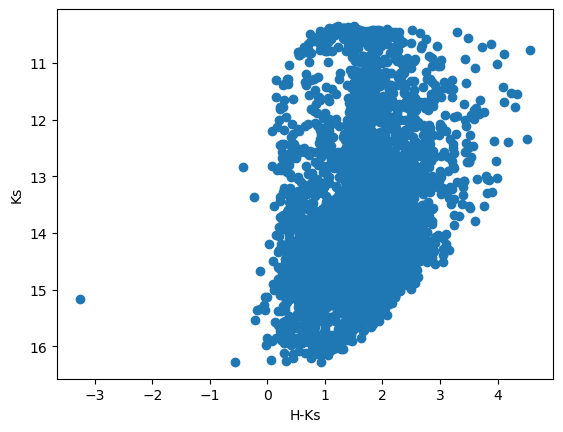

In [17]:
color = cat_VVV['H1ap1'] - cat_VVV['Ks1ap1']
mag = cat_VVV['Ks1ap1']

plt.figure()
plt.scatter(color, mag)

plt.gca().invert_yaxis()
plt.ylabel('Ks')
plt.xlabel('H-Ks')

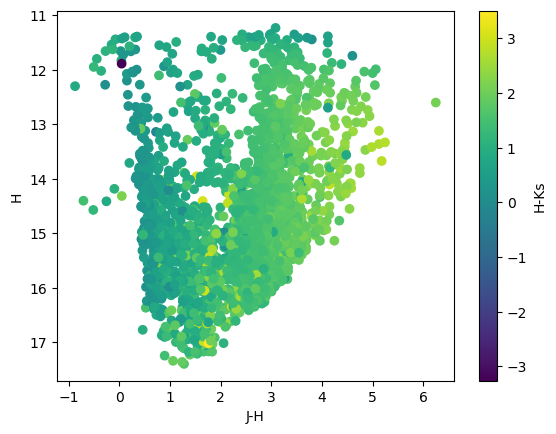

In [18]:
color = cat_VVV['J1ap1'] - cat_VVV['H1ap1']
mag = cat_VVV['H1ap1']
color2 = cat_VVV['H1ap1'] - cat_VVV['Ks1ap1']

plt.figure()
im = plt.scatter(color, mag, c=color2, cmap='viridis')

plt.gca().invert_yaxis()
plt.ylabel('H')
plt.xlabel('J-H')
plt.colorbar(im, label='H-Ks')

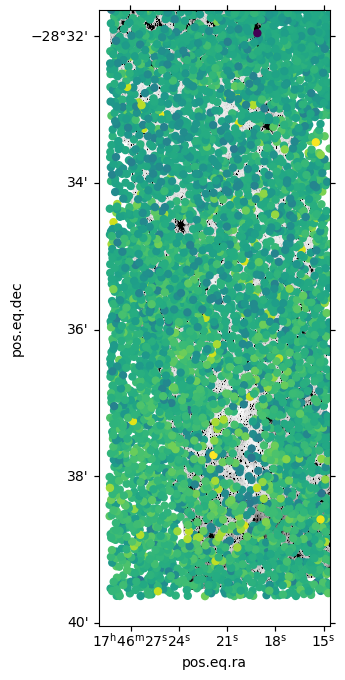

In [19]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(projection=cutout_405.wcs)

ax.imshow(cutout_405.data, cmap='Greys', vmin=0, vmax=50)
ax.scatter(cat_VVV['RAJ2000'], cat_VVV['DEJ2000'], transform=ax.get_transform('world'), s=25, facecolor='none', c=color2, cmap='viridis')

Text(0.5, 0, 'J-H')

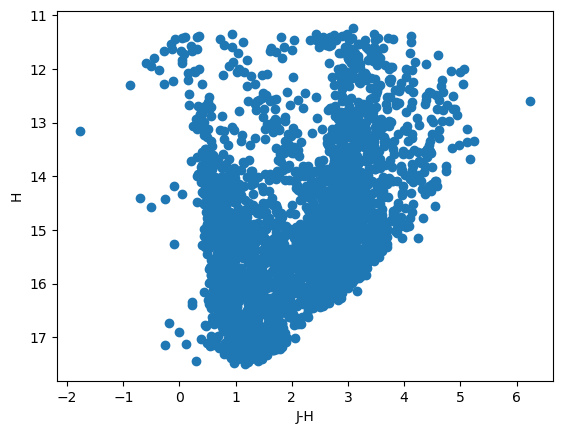

In [20]:
color1 = cat_VVV['J1ap1'] - cat_VVV['H1ap1']
color2 = cat_VVV['H1ap1'] - cat_VVV['Ks1ap1']

plt.figure()
plt.scatter(color, mag)

plt.gca().invert_yaxis()
plt.ylabel('H')
plt.xlabel('J-H')